<a href="https://colab.research.google.com/github/torchflash/MMAI831-Team-Project/blob/main/MMAI831_AI_in_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
import os
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set the directory to your specific folder in Google Drive
folder_path = "/content/drive/My Drive/Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"

# Check if the directory exists and print the list of files and folders inside it
if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    print(files)
else:
    print("Directory does not exist.")

root_dir = "/content/drive/My Drive/" 
# choose where you want your project files to be saved
project_folder = "Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"
os.chdir(root_dir + project_folder)

Mounted at /content/drive
['Dataset.xlsx', 'Kaggle Codes', 'MMAI831_AI_in_Marketing_Project.ipynb']


# Dataset Exploration (from Paper)

1. 120 unacquainted individual voted on 300 advertisements. 20 categories, and 15 ad in each category making 20X15=300 adds in total.
2. Adverts equally cover three display formats:
Rich Media Ads, Image Ads, Text Ads (i.e., 100 ads for each format)
3. Advert content is categorized in terms of 20 main product/service
categories. 
4. For each one of the categories 15 real adverts are provided.
5. Participants rated (from 1-star to 5-stars) each recommended
advertisement according to if they would or would not click on it
6. We labeled adverts as
“clicked” (rating greater or equal to four), otherwise “not clicked”
(rating less than four).
7. At the category level, the distribution of the ratings are
balanced (1,229 clicked vs 1,171 unclicked), where a category is
considered to be clicked whenever it contains at least one clicked
advert.

The proposed dataset supports a
trait theory approach to study the effect of personality on user’s motivations
and attitudes toward online in-store conversions.

The trait
approach was selected because it encourages the use of **scientifically
sound scale construction methods** for developing **reliable and
valid measures of individual differences**.



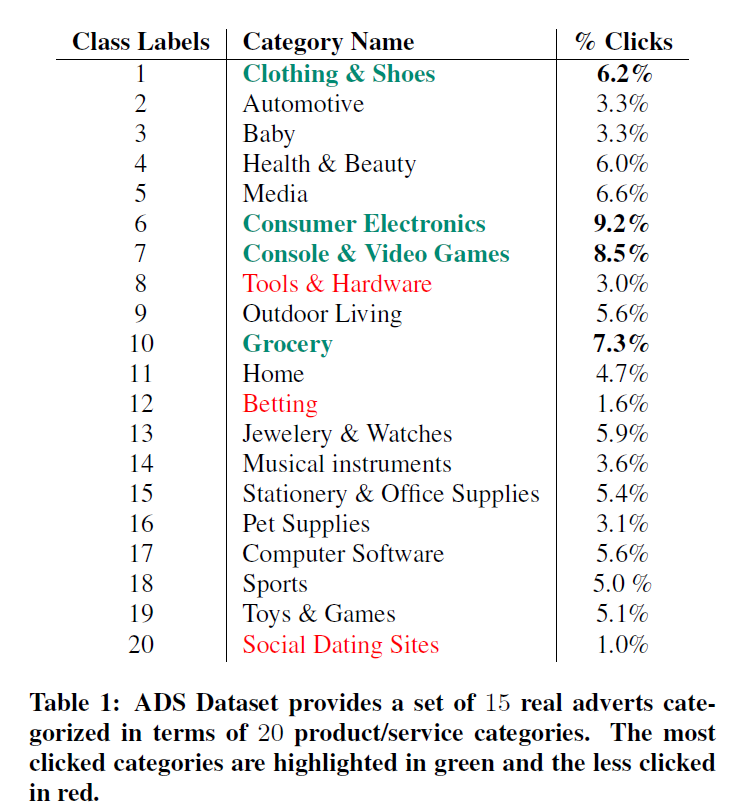





In [ ]:
data = pd.read_excel('Dataset.xlsx')

In [ ]:
df=data.copy()
# df.head()

In [ ]:
df.head()

,User,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,unfave1,unfave2,unfave3,unfave4,unfave5,unfave1-descr,unfave2-descr,unfave3-descr,unfave4-descr,unfave5-descr,fave1,fave2,fave3,fave4,fave5,fave1-descr,fave2-descr,fave3-descr,fave4-descr,fave5-descr,Name,Last Name,Gender,Age,Paypal,Type of Job,Weekly working hours,Income,Home country,Home town,Cap/Zip-Code,Timepass,Countries visited,Fave Sports,Most visited websites,Most listened musics,Most watched movies,Most watched tv programmes,Most read books,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,1-11,1-12,1-13,1-14,1-15,2-1,2-2,2-3,2-4,2-5,2-6,2-7,2-8,2-9,2-10,2-11,2-12,2-13,2-14,2-15,3-1,3-2,3-3,3-4,3-5,3-6,3-7,3-8,3-9,3-10,3-11,3-12,3-13,3-14,3-15,4-1,4-2,4-3,4-4,4-5,4-6,4-7,4-8,4-9,4-10,4-11,4-12,4-13,4-14,4-15,5-1,5-2,5-3,5-4,5-5,5-6,5-7,5-8,5-9,5-10,5-11,5-12,5-13,5-14,5-15,6-1,6-2,6-3,6-4,6-5,6-6,6-7,6-8,6-9,6-10,6-11,6-12,6-13,6-14,6-15,7-1,7-2,7-3,7-4,7-5,7-6,7-7,7-8,7-9,7-10,7-11,7-12,7-13,7-14,7-15,8-1,8-2,8-3,8-4,8-5,8-6,8-7,8-8,8-9,8-10,8-11,8-12,8-13,8-14,8-15,9-1,9-2,9-3,9-4,9-5,9-6,9-7,9-8,9-9,9-10,9-11,9-12,9-13,9-14,9-15,10-1,10-2,10-3,10-4,10-5,10-6,10-7,10-8,10-9,10-10,10-11,10-12,10-13,10-14,10-15,11-1,11-2,11-3,11-4,11-5,11-6,11-7,11-8,11-9,11-10,11-11,11-12,11-13,11-14,11-15,12-1,12-2,12-3,12-4,12-5,12-6,12-7,12-8,12-9,12-10,12-11,12-12,12-13,12-14,12-15,13-1,13-2,13-3,13-4,13-5,13-6,13-7,13-8,13-9,13-10,13-11,13-12,13-13,13-14,13-15,14-1,14-2,14-3,14-4,14-5,14-6,14-7,14-8,14-9,14-10,14-11,14-12,14-13,14-14,14-15,15-1,15-2,15-3,15-4,15-5,15-6,15-7,15-8,15-9,15-10,15-11,15-12,15-13,15-14,15-15,16-1,16-2,16-3,16-4,16-5,16-6,16-7,16-8,16-9,16-10,16-11,16-12,16-13,16-14,16-15,17-1,17-2,17-3,17-4,17-5,17-6,17-7,17-8,17-9,17-10,17-11,17-12,17-13,17-14,17-15,18-1,18-2,18-3,18-4,18-5,18-6,18-7,18-8,18-9,18-10,18-11,18-12,18-13,18-14,18-15,19-1,19-2,19-3,19-4,19-5,19-6,19-7,19-8,19-9,19-10,19-11,19-12,19-13,19-14,19-15,20-1,20-2,20-3,20-4,20-5,20-6,20-7,20-8,20-9,20-10,20-11,20-12,20-13,20-14,20-15
0,U0001,1,2,-2,0,-1,0,-2,2,-1,1,U0001-IM-NEG/1.png,U0001-IM-NEG/2.png,U0001-IM-NEG/3.png,U0001-IM-NEG/4.png,U0001-IM-NEG/5.png,news headlines,homelessness,violence,war,human rights,U0001-IM-POS/1.png,U0001-IM-POS/2.png,U0001-IM-POS/3.png,U0001-IM-POS/4.png,U0001-IM-POS/5.png,my cats,my cats,movie we are in,tv show we are in,movie we are in,Hidden,Hidden,F,62,hidden@comcast.net,Housewife/Househusband,Full Time,1,United States of America,Apollo,15613,Internet,United States of America,I do not like Sports,"Media (Books, DVD, CD/DVD Music) sites, Grocer...","Classical Music, Easy Listening, Jazz","Action, Thriller, Drama, Comedy, Mystery","Comedy, Drama",Mystery,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,3,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,3,1,1,3,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,3,4,1,2,1,1,1,1,1,1,1,1,2,3,3,2,3,3,2,1,1,2,1,1,1,2,1,2,3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,3,1,1,1,1,2,1,1,1,3,1,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,U0002,2,0,2,-2,-1,-1,2,0,2,1,U0002-IM-NEG/1.png,U0002-IM-NEG/2.png,U0002-IM-NEG/3.png,U0002-IM-NEG/4.png,U0002-IM-NEG/5.png,seafood fish,pizza,bacon,bad odor,doglicks,U0002-IM-POS/1.png,U0002-IM-POS/2.png,U0002-IM-POS/3.png,U0002-IM-POS/4.png,U0002-IM-POS/5.png,kirby videogames,beagle cute,friedzucchini,brownies chocolate peanutbutter,monet art impression postimpressionism,Hidden,Hidden,F,26,hidden@gmail.com,Contract employment,Full Time,1,United States of America,Chicago,60638,Internet,"Poland, Mexico, United States of America",Nothing,"Toys &amp; games sites, Console &amp; video ga...","Dance Music, Electronic Music, Indie Pop, Pop ...",Drama,Drama,"Romance, Mystery, Science fiction, Science",3,1,1,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,3

# Feature Engineering

## 1. Create the Big-5 Personality columns

In [ ]:
df['Openness to Experience'] = df[['Q 1', 'Q 6']].sum(axis=1)
df['Conscientiousness'] = df[['Q 2', 'Q 7']].sum(axis=1)
df['Extraversion'] = df[['Q 3', 'Q 8']].sum(axis=1)
df['Agreeableness'] = df[['Q 4', 'Q 9']].sum(axis=1)
df['Neuroticism'] = df[['Q 5', 'Q 10']].sum(axis=1)

df = df.drop(df.columns[1:33], axis=1)

# df.head()

## 2. Create a new feature and number of countries visited instead of 'countries visited' and drop no info features.

In [ ]:
def count_countries_visited(countries_visited, home_country):
    countries = countries_visited.split(", ")
    if home_country in countries:
        countries.remove(home_country)
    return len(countries)

df['Number of countries visited'] = df.apply(lambda x: count_countries_visited(x['Countries visited'], x['Home country']), axis=1)


In [ ]:
# Countries visited can have important information, as it shows user is a traveler or not. Will change it to numer of Countries visited.
columns_to_drop = ['Home town', 'Cap/Zip-Code', 'Countries visited', 'User', 'Paypal', ]
df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

,Gender,Age,Type of Job,Weekly working hours,Income,Home country,Timepass,Fave Sports,Most visited websites,Most listened musics,Most watched movies,Most watched tv programmes,Most read books,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,1-11,1-12,1-13,1-14,1-15,2-1,2-2,2-3,2-4,2-5,2-6,2-7,2-8,2-9,2-10,2-11,2-12,2-13,2-14,2-15,3-1,3-2,3-3,3-4,3-5,3-6,3-7,3-8,3-9,3-10,3-11,3-12,3-13,3-14,3-15,4-1,4-2,4-3,4-4,4-5,4-6,4-7,4-8,4-9,4-10,4-11,4-12,4-13,4-14,4-15,5-1,5-2,5-3,5-4,5-5,5-6,5-7,5-8,5-9,5-10,5-11,5-12,5-13,5-14,5-15,6-1,6-2,6-3,6-4,6-5,6-6,6-7,6-8,6-9,6-10,6-11,6-12,6-13,6-14,6-15,7-1,7-2,7-3,7-4,7-5,7-6,7-7,7-8,7-9,7-10,7-11,7-12,7-13,7-14,7-15,8-1,8-2,8-3,8-4,8-5,8-6,8-7,8-8,8-9,8-10,8-11,8-12,8-13,8-14,8-15,9-1,9-2,9-3,9-4,9-5,9-6,9-7,9-8,9-9,9-10,9-11,9-12,9-13,9-14,9-15,10-1,10-2,10-3,10-4,10-5,10-6,10-7,10-8,10-9,10-10,10-11,10-12,10-13,10-14,10-15,11-1,11-2,11-3,11-4,11-5,11-6,11-7,11-8,11-9,11-10,11-11,11-12,11-13,11-14,11-15,12-1,12-2,12-3,12-4,12-5,12-6,12-7,12-8,12-9,12-10,12-11,12-12,12-13,12-14,12-15,13-1,13-2,13-3,13-4,13-5,13-6,13-7,13-8,13-9,13-10,13-11,13-12,13-13,13-14,13-15,14-1,14-2,14-3,14-4,14-5,14-6,14-7,14-8,14-9,14-10,14-11,14-12,14-13,14-14,14-15,15-1,15-2,15-3,15-4,15-5,15-6,15-7,15-8,15-9,15-10,15-11,15-12,15-13,15-14,15-15,16-1,16-2,16-3,16-4,16-5,16-6,16-7,16-8,16-9,16-10,16-11,16-12,16-13,16-14,16-15,17-1,17-2,17-3,17-4,17-5,17-6,17-7,17-8,17-9,17-10,17-11,17-12,17-13,17-14,17-15,18-1,18-2,18-3,18-4,18-5,18-6,18-7,18-8,18-9,18-10,18-11,18-12,18-13,18-14,18-15,19-1,19-2,19-3,19-4,19-5,19-6,19-7,19-8,19-9,19-10,19-11,19-12,19-13,19-14,19-15,20-1,20-2,20-3,20-4,20-5,20-6,20-7,20-8,20-9,20-10,20-11,20-12,20-13,20-14,20-15,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited
0,F,62,Housewife/Househusband,Full Time,1,United States of America,Internet,I do not like Sports,"Media (Books, DVD, CD/DVD Music) sites, Grocer...","Classical Music, Easy Listening, Jazz","Action, Thriller, Drama, Comedy, Mystery","Comedy, Drama",Mystery,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,3,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,3,1,1,3,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,3,4,1,2,1,1,1,1,1,1,1,1,2,3,3,2,3,3,2,1,1,2,1,1,1,2,1,2,3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,3,1,1,1,1,2,1,1,1,3,1,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,-1,0,0
1,F,26,Contract employment,Full Time,1,United States of America,Internet,Nothing,"Toys &amp; games sites, Console &amp; video ga...","Dance Music, Electronic Music, Indie Pop, Pop ...",Drama,Drama,"Romance, Mystery, Science fiction, Science",3,1,1,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,3,1,1,1,1,1,1,1,3,1,1,1,1,1,3,1,1,1,2,1,3,1,5,5,2,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,3,1,1,1,1,1,4,1,1,1,1,1,1,2,3,4,4,1,1,1,2,3,1,3,4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,3,2,3,1,1,3,1,1,1,3,1,1,1,1,1,2,1,2,1,2,1,1,1,1,1,2,2,2,2,4,2,1,1,2,1,1,1,1,1,2,3,1,1,1,1,1,2,1,1,1,1,1,3,1,2,4,1,1,1,1,1,1,1,1,1,2,1,1,2,1,3,2,1,1,1,1,1,1,1,1,1,1,3,4,1,2,1,1,1,1,3,1,2,1,1,2,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,2,0,0,2
2,M,22,Contract employment,Full Time,1,United States of America,Sports,"Team sports (Footbal, Baseball, Rugby, ...)","Sports &amp; outdoor sites, Media (Books, DVD,...","Hip Hop - Rap, Dance Music, Electronic Music, ...","Comedy, Documentary","Sport, News",Biographies,4,3,1,5,2,1,1,1,3,2,4,1,1,1,4,2,2,3,4,3,4,3,5,2,1,2,4,5,4,1,1,2,1,1,1,2,2,3,3,2,1,1,1,1,1,1,1,2,3,5,4,1,5,3,2,2,1,2,4,3,5,3,3,4,4,4,4,5,2,3,3,3,3,4,3,4,3,5,5,2,1,4,2,5,4,3,5,2,5,5,5,4,5,4,5,5,5,5,5,5,5,5,4,5,5,2,4,2,2,4,2,3

## 3. Based on df['Most visited websites'] feature, get all categories and comapare it to the 20 categories from Dataset. Create 20 columns according to 20 categories, if the category from  df['Most visited websites'] feature exists in the 20 categories the column is 1 else 0.

In [ ]:
unique_categories = df['Most visited websites'].unique()
print(len(unique_categories))
# we have 20 categories in the Dataset

93


In [ ]:
# cleanup the categores from 'Most visited websites'
df['Most visited websites'] = df['Most visited websites'].str.replace("amp;", "")
df['Most visited websites'] = df['Most visited websites'].str.replace(" sites", "")
df['Most visited websites'] = df['Most visited websites'].str.replace("Books, DVD, CD/DVD Music", "BMVD")

In [ ]:
df['Most visited websites'][22]

'Media (BMVD), Dating'

In [ ]:
categories = pd.read_excel('Dataset.xlsx',sheet_name='Categories')
categories = categories.transpose()
unique_values = categories.iloc[1].unique().tolist()
unique_values.append('Clothing & Shoes')
unique_values = ['Media' if x == 'Media (BMVD)' else x for x in unique_values]
unique_values = ['Home' if x == 'Kitchen & Home' else x for x in unique_values]
unique_values = ['Office' if x == 'Office Products' else x for x in unique_values]
unique_values = ['Dating' if x == 'Dating Sites' else x for x in unique_values]
unique_values = ['Sports' if x == 'Sports & Outdoors' else x for x in unique_values]
unique_values = ['Living' if x == 'Garden & Outdoor living' else x for x in unique_values]
unique_values = ['Tools' if x == 'DIY & Tools' else x for x in unique_values]

unique_values

['Automotive',
 'Baby Products',
 'Health & Beauty',
 'Media',
 'Consumer Electronics',
 'Console & Video Games',
 'Tools',
 'Living',
 'Grocery',
 'Home',
 'Betting',
 'Jewellery & Watches',
 'Musical Instruments',
 'Office',
 'Pet Supplies',
 'Computer Software',
 'Sports',
 'Toys & Games',
 'Dating',
 'Clothing & Shoes']

In [ ]:
for category in unique_values:
    new_column_name = 'visits web in ' + category
    df[new_column_name] = df['Most visited websites'].str.contains(category, case=False).astype(int)

In [ ]:
column_counts = df.iloc[:, -20:].apply(pd.Series.value_counts)

# Print the counts
print(column_counts)

   visits web in Automotive  visits web in Baby Products  \
0                       113                          114   
1                         7                            6   

   visits web in Health & Beauty  visits web in Media  \
0                             73                   79   
1                             47                   41   

   visits web in Consumer Electronics  visits web in Console & Video Games  \
0                                  98                                   92   
1                                  22                                   28   

   visits web in Tools  visits web in Living  visits web in Grocery  \
0                  109                   107                    105   
1                   11                    13                     15   

   visits web in Home  visits web in Betting  \
0                 104                    111   
1                  16                      9   

   visits web in Jewellery & Watches  visits web in M

## 4. Create MAX and AVERAGE star numbers given to each category and clicked and not-clicked features based on category class and Ad number columns

In [ ]:
click_df=df.iloc[:, 13:313]

In [ ]:
df = df.drop(df.columns[13:313], axis=1)

In [ ]:
def extract_first_digit(column_name):
    return int(column_name.split('-')[0])

# Group by the first digit of column names and calculate the maximum and average value for each row within the group
grouped = click_df.groupby(extract_first_digit, axis=1).max()
ave_star = click_df.groupby(extract_first_digit, axis=1).mean()
# Define the new column names
new_column_names = unique_values

# Rename the columns of the grouped DataFrame
grouped.rename(columns=dict(zip(grouped.columns, new_column_names)), inplace=True)
ave_star.rename(columns=dict(zip(ave_star.columns, new_column_names)), inplace=True)

In [ ]:
for category in unique_values:
    new_column_name = 'max star in ' + category
    df[new_column_name] = grouped[category]

for category in unique_values:
    new_column_name = 'clicks ' + category
    df[new_column_name] = [1 if val == 4 or val == 5 else 0 for val in grouped[category]]

for category in unique_values:
    new_column_name = 'average star in ' + category
    df[new_column_name] = ave_star[category]


In [ ]:
df.head()

,Gender,Age,Type of Job,Weekly working hours,Income,Home country,Timepass,Fave Sports,Most visited websites,Most listened musics,Most watched movies,Most watched tv programmes,Most read books,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited,visits web in Automotive,visits web in Baby Products,visits web in Health & Beauty,visits web in Media,visits web in Consumer Electronics,visits web in Console & Video Games,visits web in Tools,visits web in Living,visits web in Grocery,visits web in Home,visits web in Betting,visits web in Jewellery & Watches,visits web in Musical Instruments,visits web in Office,visits web in Pet Supplies,visits web in Computer Software,visits web in Sports,visits web in Toys & Games,visits web in Dating,visits web in Clothing & Shoes,max star in Automotive,max star in Baby Products,max star in Health & Beauty,max star in Media,max star in Consumer Electronics,max star in Console & Video Games,max star in Tools,max star in Living,max star in Grocery,max star in Home,max star in Betting,max star in Jewellery & Watches,max star in Musical Instruments,max star in Office,max star in Pet Supplies,max star in Computer Software,max star in Sports,max star in Toys & Games,max star in Dating,max star in Clothing & Shoes,clicks Automotive,clicks Baby Products,clicks Health & Beauty,clicks Media,clicks Consumer Electronics,clicks Console & Video Games,clicks Tools,clicks Living,clicks Grocery,clicks Home,clicks Betting,clicks Jewellery & Watches,clicks Musical Instruments,clicks Office,clicks Pet Supplies,clicks Computer Software,clicks Sports,clicks Toys & Games,clicks Dating,clicks Clothing & Shoes,average star in Automotive,average star in Baby Products,average star in Health & Beauty,average star in Media,average star in Consumer Electronics,average star in Console & Video Games,average star in Tools,average star in Living,average star in Grocery,average star in Home,average star in Betting,average star in Jewellery & Watches,average star in Musical Instruments,average star in Office,average star in Pet Supplies,average star in Computer Software,average star in Sports,average star in Toys & Games,average star in Dating,average star in Clothing & Shoes
0,1,62,Housewife/Househusband,Full Time,1,United States of America,Internet,I do not like Sports,"Media (BMVD), Grocery & beverages, Pet supplies","Classical Music, Easy Listening, Jazz","Action, Thriller, Drama, Comedy, Mystery","Comedy, Drama",Mystery,1,0,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,1,3,3,1,3,1,2,3,2,3,1,3,3,4,3,2,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.133333,1.000000,1.200000,1.333333,1.000000,1.333333,1.000000,1.066667,1.400000,1.266667,1.133333,1.000000,1.200000,1.133333,1.600000,1.866667,1.066667,1.266667,1.333333,1.000000
1,1,26,Contract employment,Full Time,1,United States of America,Internet,Nothing,"Toys & games, Console & video games","Dance Music, Electronic Music, Indie Pop, Pop ...",Drama,Drama,"Romance, Mystery, Science fiction, Science",1,2,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,3,1,2,3,3,5,1,3,4,4,1,3,3,4,3,4,3,4,2,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1.333333,1.133333,1.000000,1.133333,1.266667,1.466667,1.800000,1.000000,1.266667,1.333333,2.200000,1.000000,1.400000,1.466667,1.600000,1.266667,1.400000,1.333333,1.600000,1.200000
2,0,22,Contract employment,Full Time,1,United States of America,Sports,"Team sports (Footbal, Baseball, Rugby, ...)","Sports & outdoor, Media (BMVD)","Hip Hop - Rap, Dance Music, Electronic Music, ...","Comedy, Documentary","Sport, News",Biographies,1,1,2,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2.266667,3.000000,1.533333,2.600000,3.533333,3.666667,4.800000,3.000000,2.333333,4.133333,3.333333,3.133333,2.533333,2.200000,3.066667,2.466667,3.133333,2.666667,2.866667,1.400000
3,1,24,Student,Part Time,1,Great Britain,Internet,"Individual sport

## 5. Treating Categorical Features

Gender and Tyoe of work are categorical with 2 values, M and F for Gender and Full time and Part time for type of work. Will change it to Female, 1 if yes 0 if male and to 1 if full time and 0 is part time work type.

rest of the categorical features require encoding which wil be done in model development

In [ ]:
df['Gender'] = df['Gender'].map({'F': 1, 'M': 0})

df['Weekly working hours'] = df['Gender'].map({'Full Time': 1, 'Part Time': 0})

In [ ]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['Type of Job', 'Home country', 'Timepass', 'Fave Sports',
       'Most visited websites', 'Most listened musics', 'Most watched movies',
       'Most watched tv programmes', 'Most read books'],
      dtype='object')

In [ ]:
df['Type of Job'].value_counts()

Contract employment       39
Student                   37
Temporary                 18
Self-employment           14
Unemploied                 6
Housewife/Househusband     2
Odd job                    2
Consulting                 2
Name: Type of Job, dtype: int64

In [ ]:
df['Home country'].value_counts()

United States of America    67
United Kingdom              20
Canada                      17
India                        6
Slovenia                     2
Singapore                    2
Great Britain                1
Czech Republic               1
Saudi Arabia                 1
Romania                      1
Phillipines                  1
Italy                        1
Name: Home country, dtype: int64

In [ ]:
df['Timepass'].value_counts()

Internet    61
Reading     23
Sports      14
Music       11
Movie       11
Name: Timepass, dtype: int64

In [ ]:
df['Fave Sports'].value_counts()

I do not like Sports                                                                                                                                                                  19
Team sports (Footbal, Baseball, Rugby, ...)                                                                                                                                           15
Individual sports‎ (Tennis, Archery, ...)                                                                                                                                             13
Other                                                                                                                                                                                  5
Individual sports‎ (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...)                                                                                                 4
Winter sports                                                              

In [ ]:
df['Fave Sports'].value_counts()

# Exporting Cleaned data

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/MMAI831 AI in Marketing/EMC Project/cleaned_data.csv'

# Export the DataFrame to CSV
df.to_csv(file_path, index=False)


# Distributions

## Histograms

In [ ]:
web_visit_frequency_df = df.iloc[:, 19:39:].sum().sort_values(ascending=False)
print("Frequency Distribution:")
print(web_visit_frequency_df)

Frequency Distribution:
visits web in Clothing & Shoes         50
visits web in Health & Beauty          47
visits web in Media                    41
visits web in Console & Video Games    28
visits web in Consumer Electronics     22
visits web in Computer Software        16
visits web in Home                     16
visits web in Grocery                  15
visits web in Jewellery & Watches      15
visits web in Sports                   15
visits web in Living                   13
visits web in Toys & Games             12
visits web in Pet Supplies             12
visits web in Tools                    11
visits web in Dating                    9
visits web in Betting                   9
visits web in Office                    9
visits web in Automotive                7
visits web in Baby Products             6
visits web in Musical Instruments       5
dtype: int64


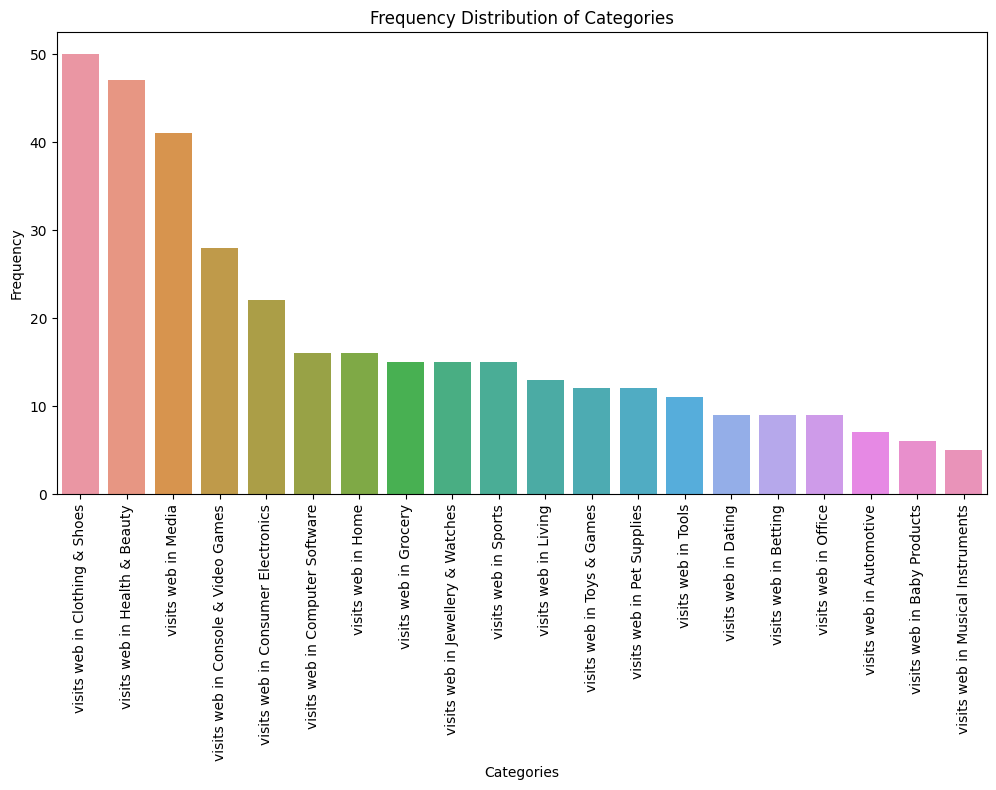

In [ ]:
# Bar Plot for Frequency Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=web_visit_frequency_df.index, y=web_visit_frequency_df.values)
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Categories")
plt.show()

In [ ]:
max_star_frequency_df = df.iloc[:, 39:59:].sum().sort_values(ascending=False)
print("Frequency Distribution:")
print(max_star_frequency_df)

Frequency Distribution:
max star in Consumer Electronics     489
max star in Automotive               475
max star in Sports                   464
max star in Home                     464
max star in Console & Video Games    458
max star in Toys & Games             452
max star in Media                    449
max star in Pet Supplies             446
max star in Dating                   437
max star in Musical Instruments      425
max star in Betting                  425
max star in Grocery                  400
max star in Tools                    392
max star in Computer Software        376
max star in Baby Products            371
max star in Office                   369
max star in Living                   354
max star in Health & Beauty          353
max star in Clothing & Shoes         280
max star in Jewellery & Watches      272
dtype: int64


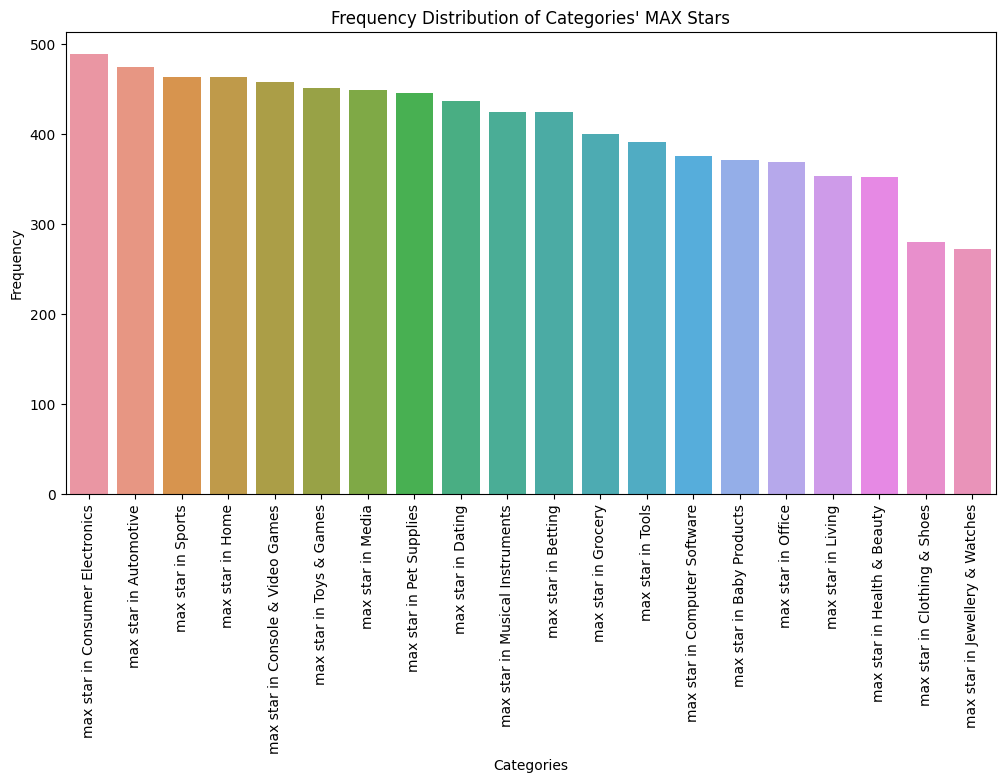

In [ ]:
# Bar Plot for Frequency Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=max_star_frequency_df.index, y=max_star_frequency_df.values)
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Categories' MAX Stars")
plt.show()

In [ ]:
click_frequency_df = df.iloc[:, 59:79:].sum().sort_values(ascending=False)
print("Frequency Distribution:")
print(click_frequency_df)

Frequency Distribution:
clicks Consumer Electronics     86
clicks Automotive               85
clicks Sports                   83
clicks Home                     79
clicks Pet Supplies             73
clicks Console & Video Games    72
clicks Media                    71
clicks Toys & Games             71
clicks Dating                   67
clicks Musical Instruments      65
clicks Betting                  63
clicks Tools                    60
clicks Grocery                  56
clicks Baby Products            54
clicks Computer Software        50
clicks Office                   49
clicks Health & Beauty          47
clicks Living                   42
clicks Clothing & Shoes         30
clicks Jewellery & Watches      26
dtype: int64


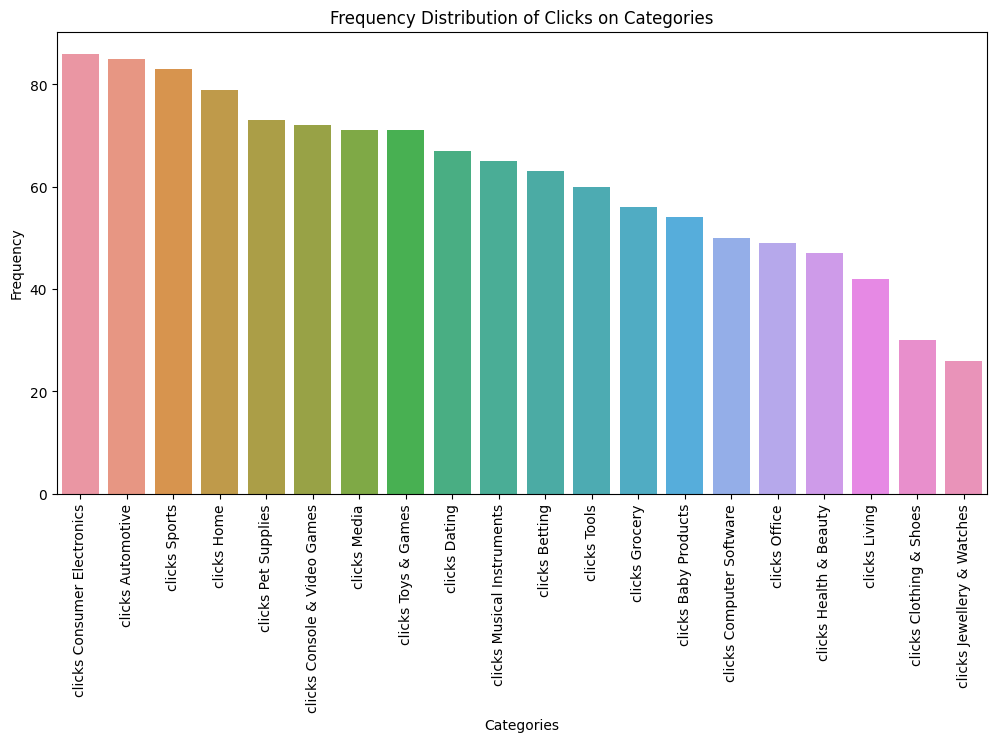

In [ ]:
# Bar Plot for Frequency Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=click_frequency_df.index, y=click_frequency_df.values)
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Clicks on Categories")
plt.show()

In [ ]:
average_star_frequency_df = df.iloc[:, 79:99:].sum().sort_values(ascending=False)
print("Frequency Distribution:")
print(average_star_frequency_df)

Frequency Distribution:
average star in Console & Video Games    275.666667
average star in Consumer Electronics     262.933333
average star in Home                     256.466667
average star in Automotive               251.266667
average star in Pet Supplies             249.533333
average star in Tools                    248.133333
average star in Musical Instruments      246.466667
average star in Sports                   245.400000
average star in Media                    243.133333
average star in Grocery                  239.133333
average star in Toys & Games             235.866667
average star in Dating                   233.266667
average star in Betting                  228.066667
average star in Office                   209.066667
average star in Computer Software        206.866667
average star in Baby Products            206.533333
average star in Living                   205.466667
average star in Health & Beauty          188.866667
average star in Clothing & Shoes        

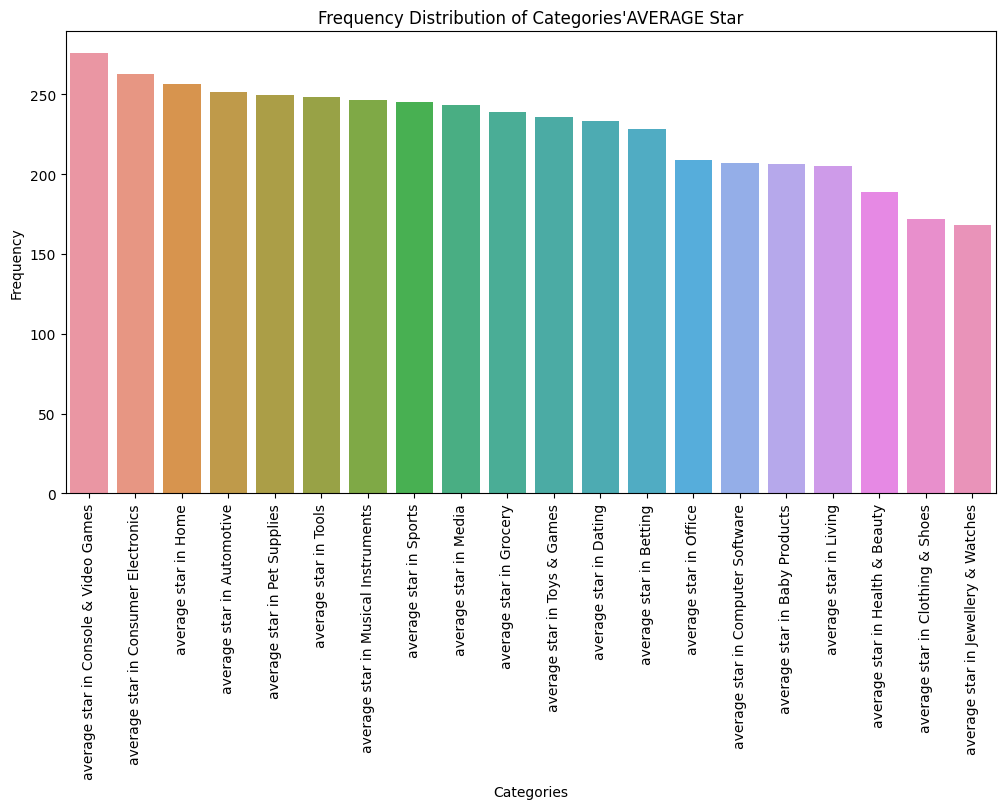

In [ ]:
# Bar Plot for Frequency Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=average_star_frequency_df.index, y=average_star_frequency_df.values)
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Categories'AVERAGE Star")
plt.show()

## Corrleation Matrices

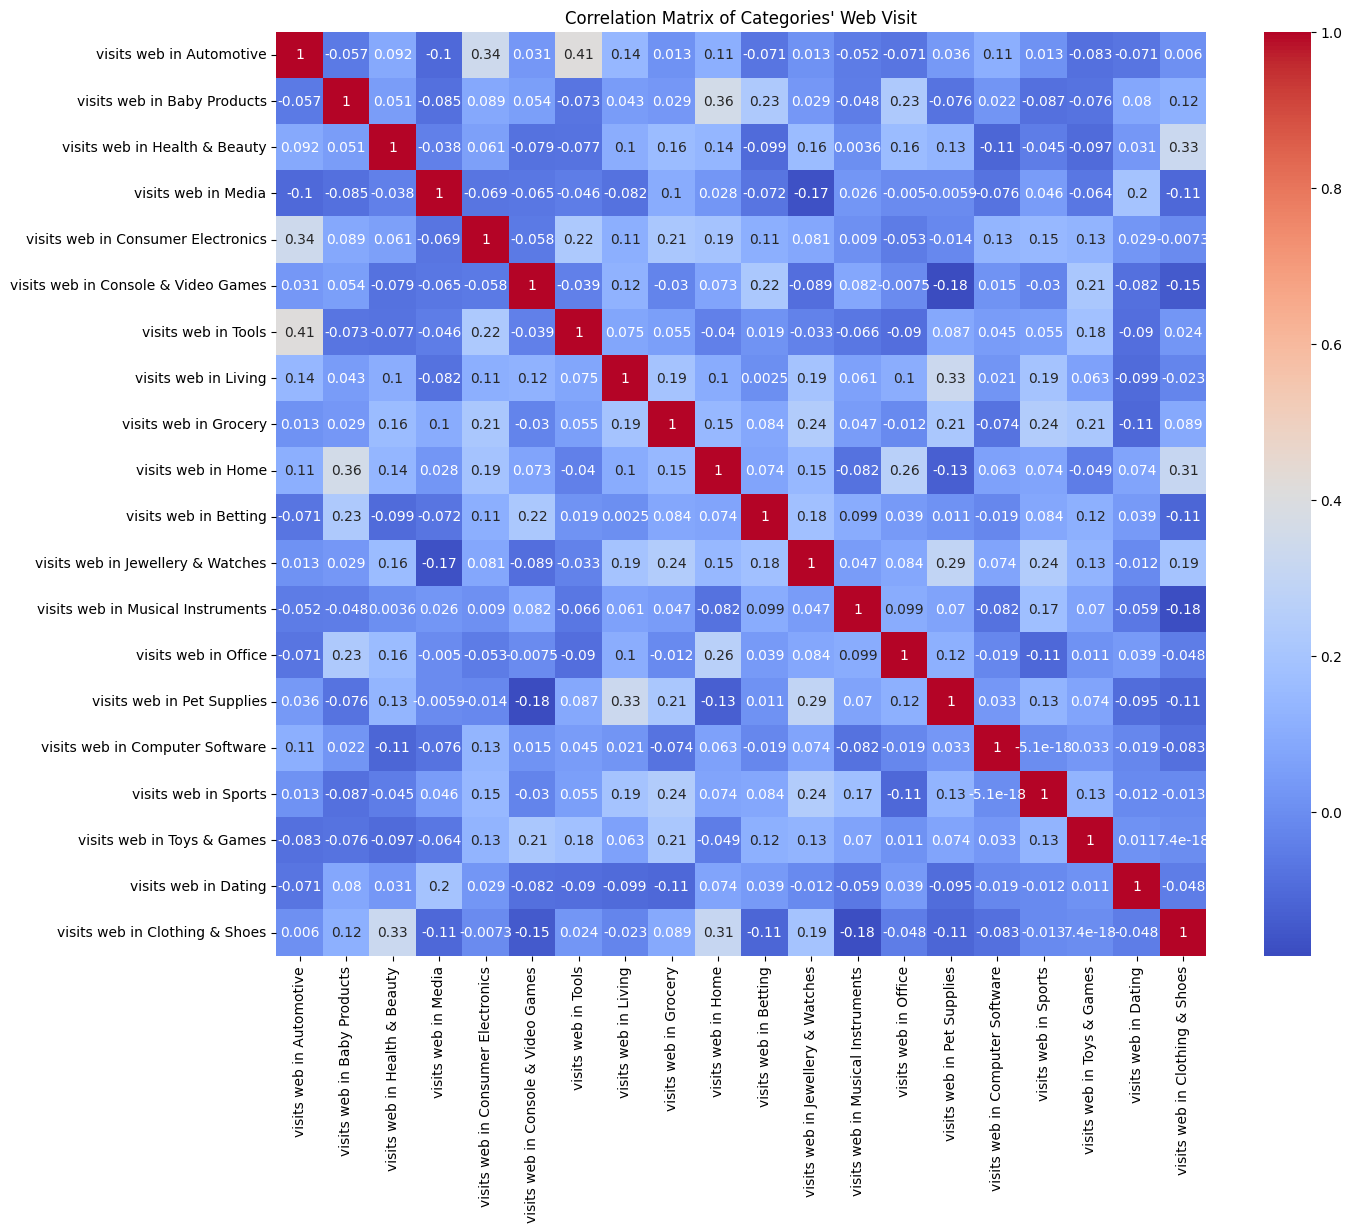

In [ ]:
# Correlation Analysis
correlation_matrix = df.iloc[:, 19:39:].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Categories' Web Visit")
plt.show()


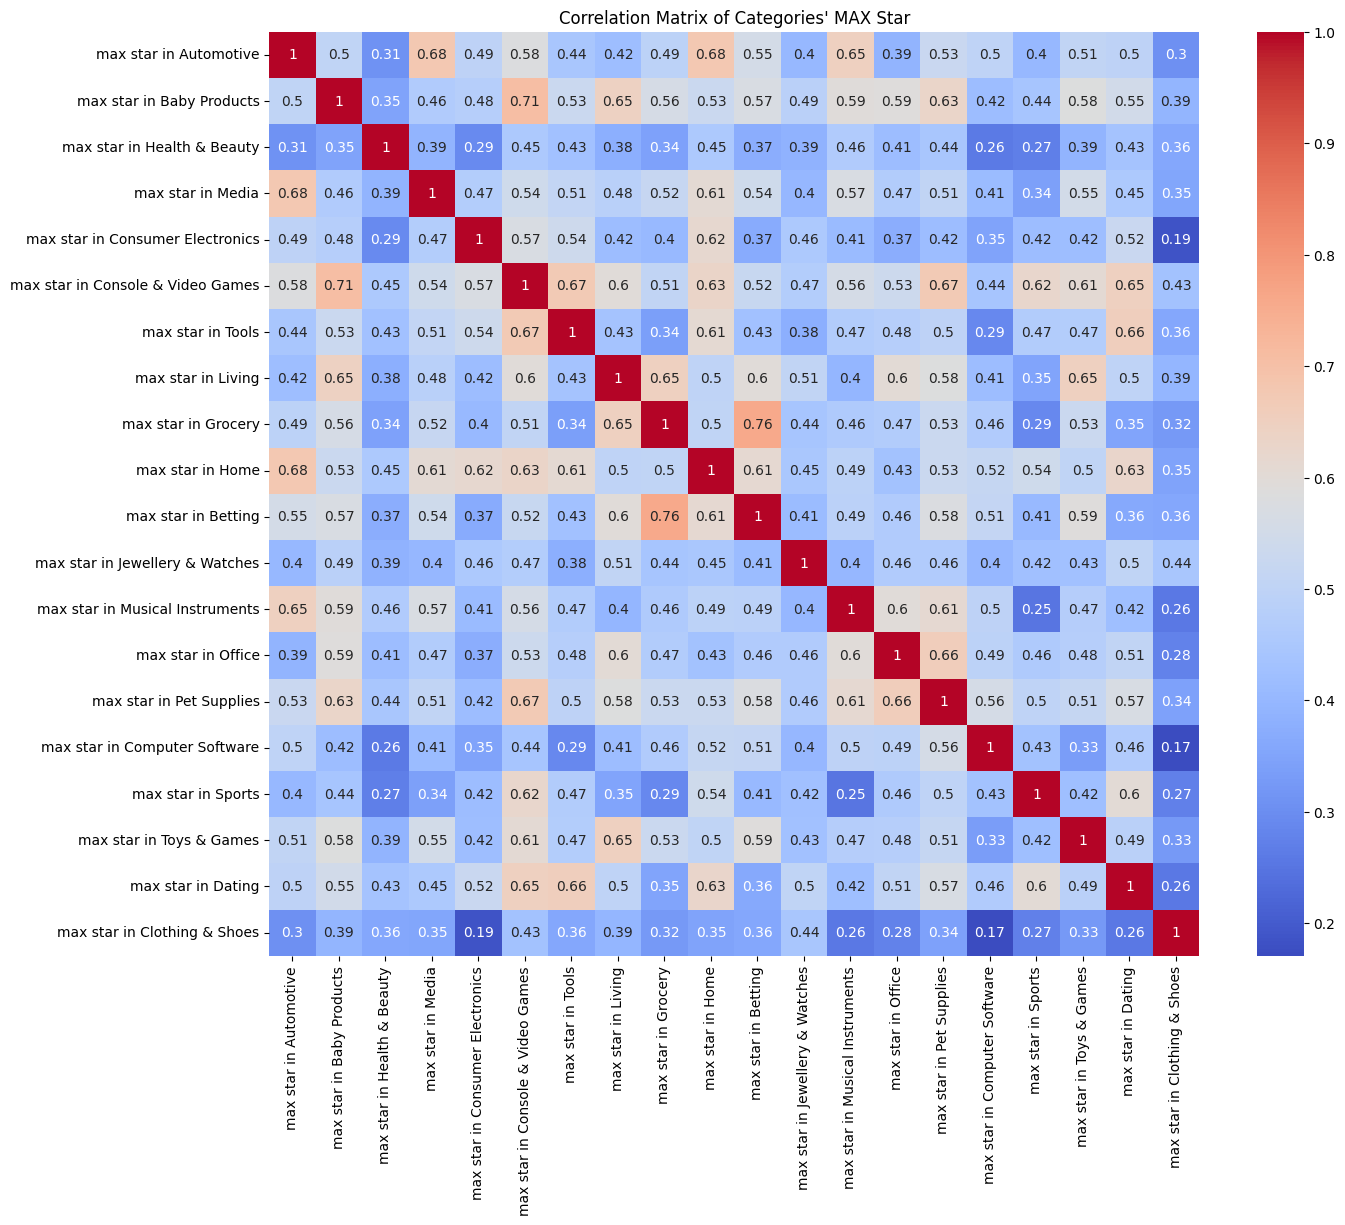

In [ ]:
# Correlation Analysis
correlation_matrix = df.iloc[:, 39:59:].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Categories' MAX Star")
plt.show()

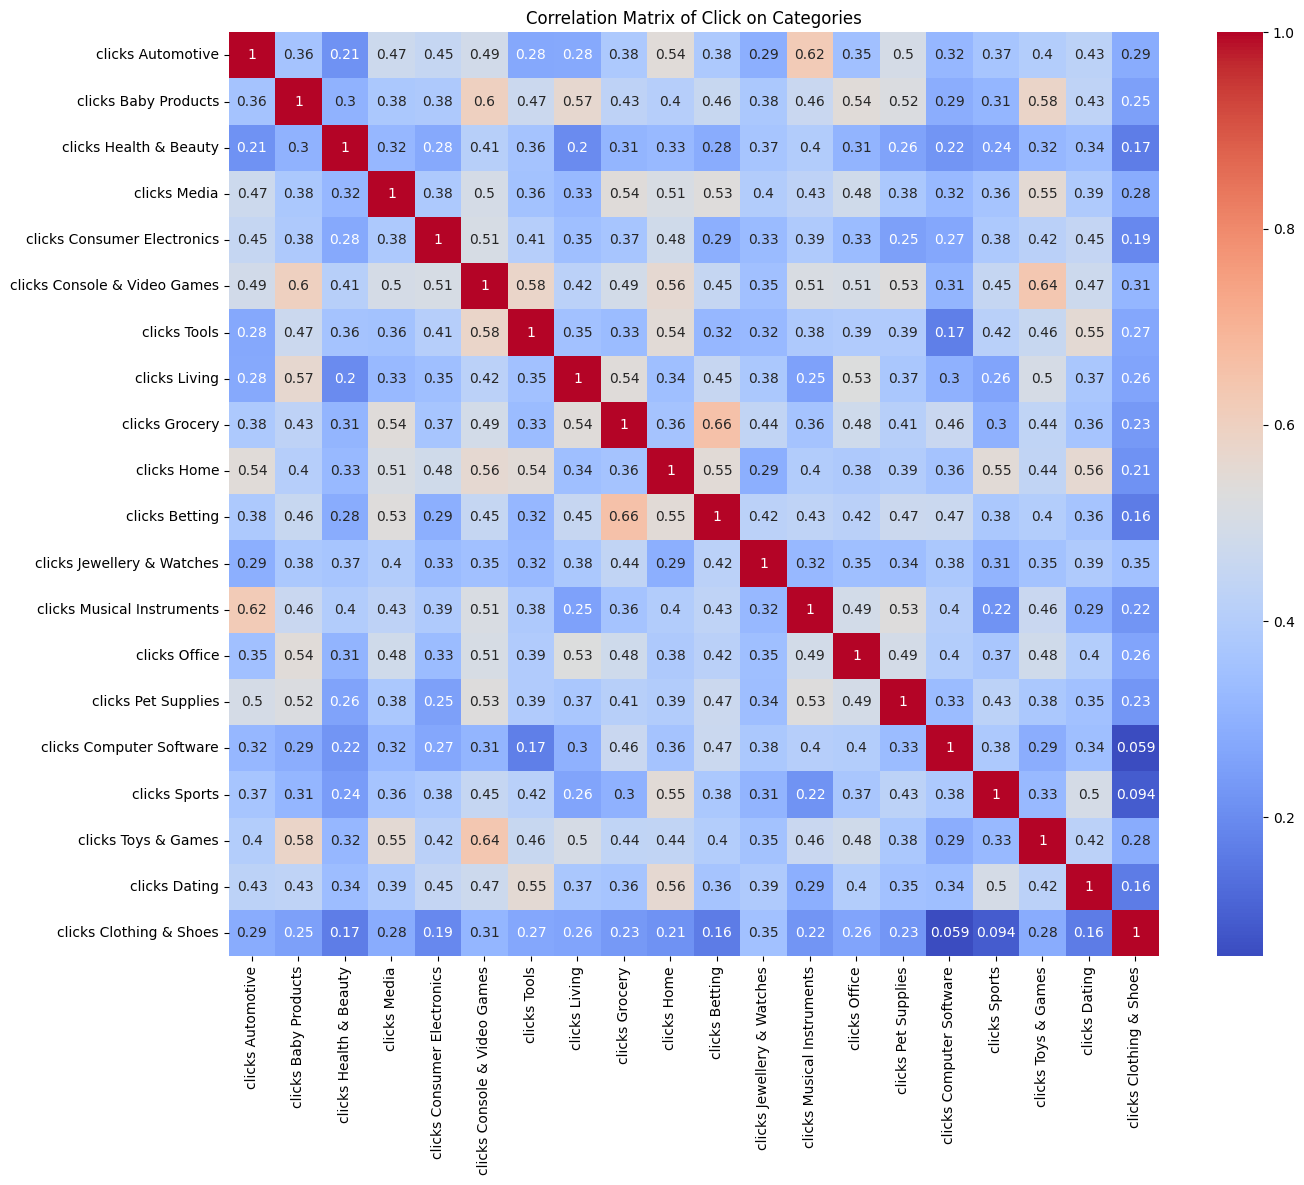

In [ ]:
# Correlation Analysis
correlation_matrix = df.iloc[:, 59:79:].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Click on Categories")
plt.show()

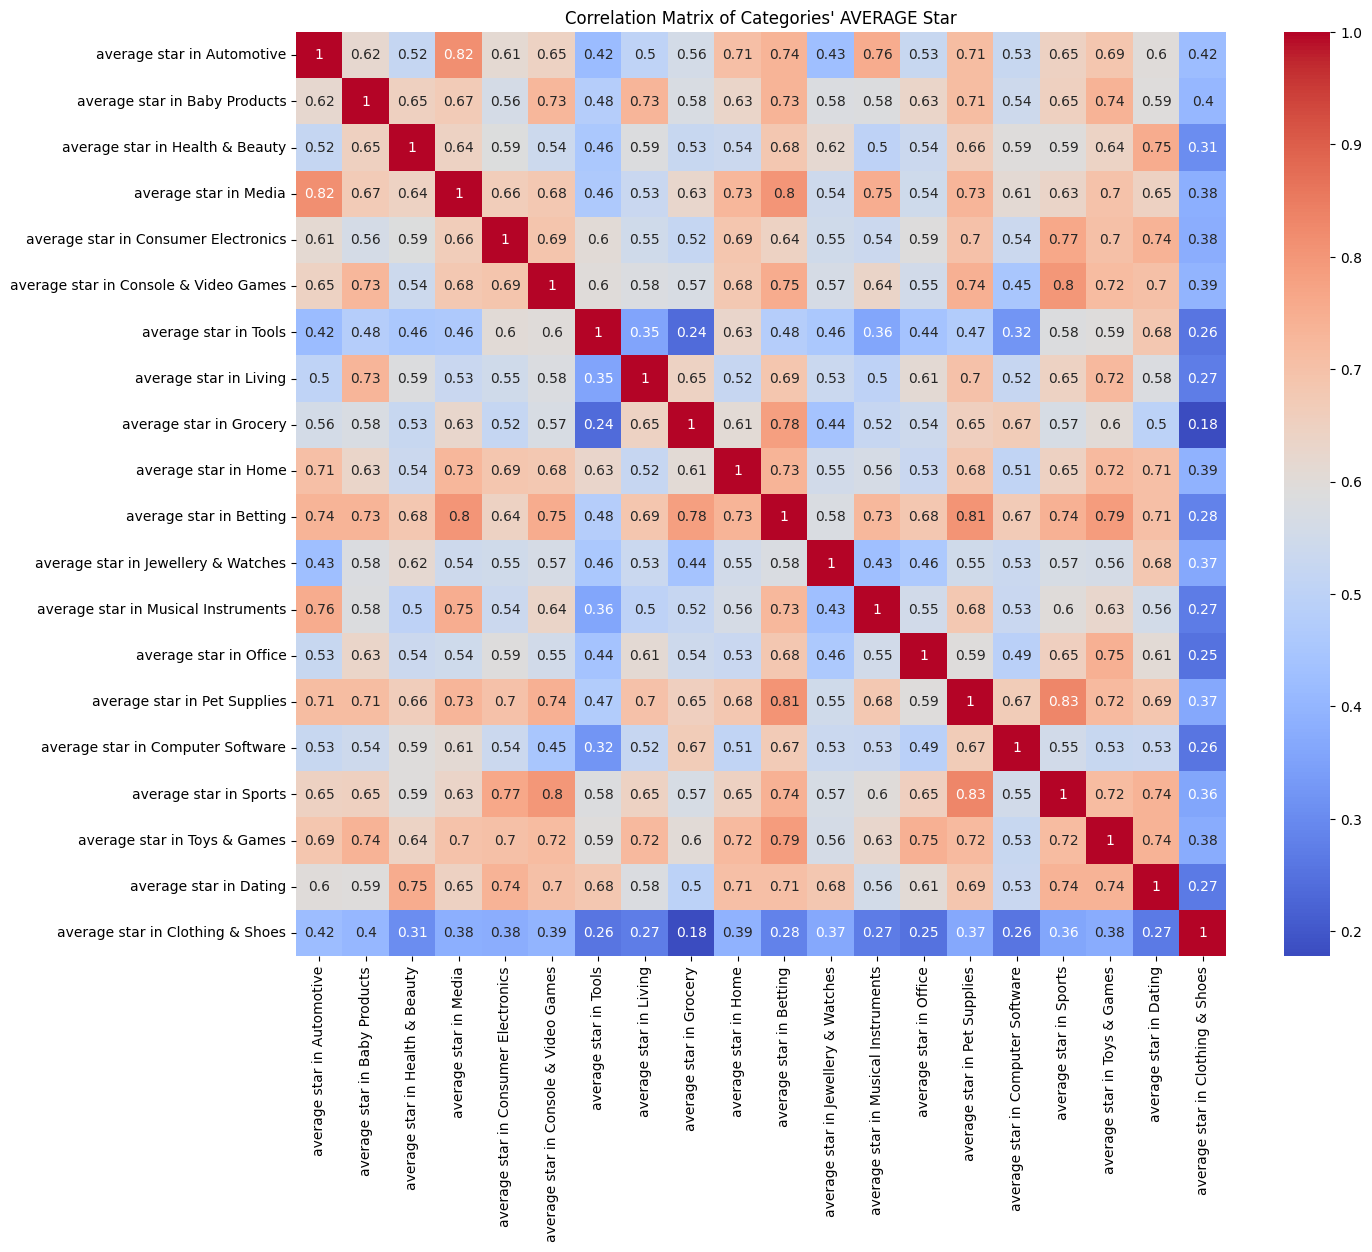

In [ ]:
# Correlation Analysis
correlation_matrix = df.iloc[:, 79:99:].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Categories' AVERAGE Star")
plt.show()